## pyCELP rho vs inclination (recreates Schad & Dima (2020) Figure 5) 

 - written by Tom Schad 

In [1]:
import numpy as np
import pycelp
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='rkbgym')

In [2]:
##########################
## DO pycelp CALCULATIONS

fe14 = pycelp.Ion('fe_14',nlevels = 100)
fe13 = pycelp.Ion('fe_13',nlevels = 100)
fe11 = pycelp.Ion('fe_11',nlevels = 100)
si10 = pycelp.Ion('si_10',nlevels = 100)
si9 = pycelp.Ion('si_9',nlevels = 100)
models = fe14,fe11,fe13,fe13,si10,si9

wvls = 5303,7892,10746,10798,14301,39343
rphot = 0.5
iontemps =  10.**np.array([6.3,6.1,6.25,6.25,6.15,6.05])
dens = 1.e5

nt = 100
thetabs = np.linspace(0,90,nt)
py_align = np.zeros((6,nt))
py_rho00 = np.zeros((6,nt))

for n in range(6):
    print(n)
    for t,thetab in enumerate(thetabs):
        models[n].calc_rho_sym(dens,iontemps[n],rphot,thetab,include_limbdark = True,include_protons = True)
        py_align[n,t] = models[n].get_upper_level_alignment(wvls[n])
        py_rho00[n,t] = models[n].get_upper_level_rho00(wvls[n])

py_rho00_ref = np.zeros(6)
vv =  np.rad2deg(np.arccos(1./np.sqrt(3.)))  ## Van Vleck
for n in range(6):
    models[n].calc_rho_sym(dens,iontemps[n],rphot,vv,include_limbdark = True,include_protons = True)
    py_rho00_ref[n] = models[n].get_upper_level_rho00(wvls[n])

 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.wgfa
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.scups
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_14/fe_14.psplups
 using default abundances: /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 reading:  /usr/local/ssw/packages/chianti/dbase/abundance/sun_photospheric_2009_asplund.abund
 testing default file: /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 reading:  /usr/local/ssw/packages/chianti/dbase/ioneq/chianti.ioneq
 setting up electron collision rate factors
 setting up proton  collision rate factors
 setting up non-dipole radiative rate factors
 getting non-dipole rate factors
 setting up dipole radiative rate factors
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.elvlc
 reading:  /usr/local/ssw/packages/chianti/dbase/fe/fe_13/fe_13.wgfa
 reading:  /usr/

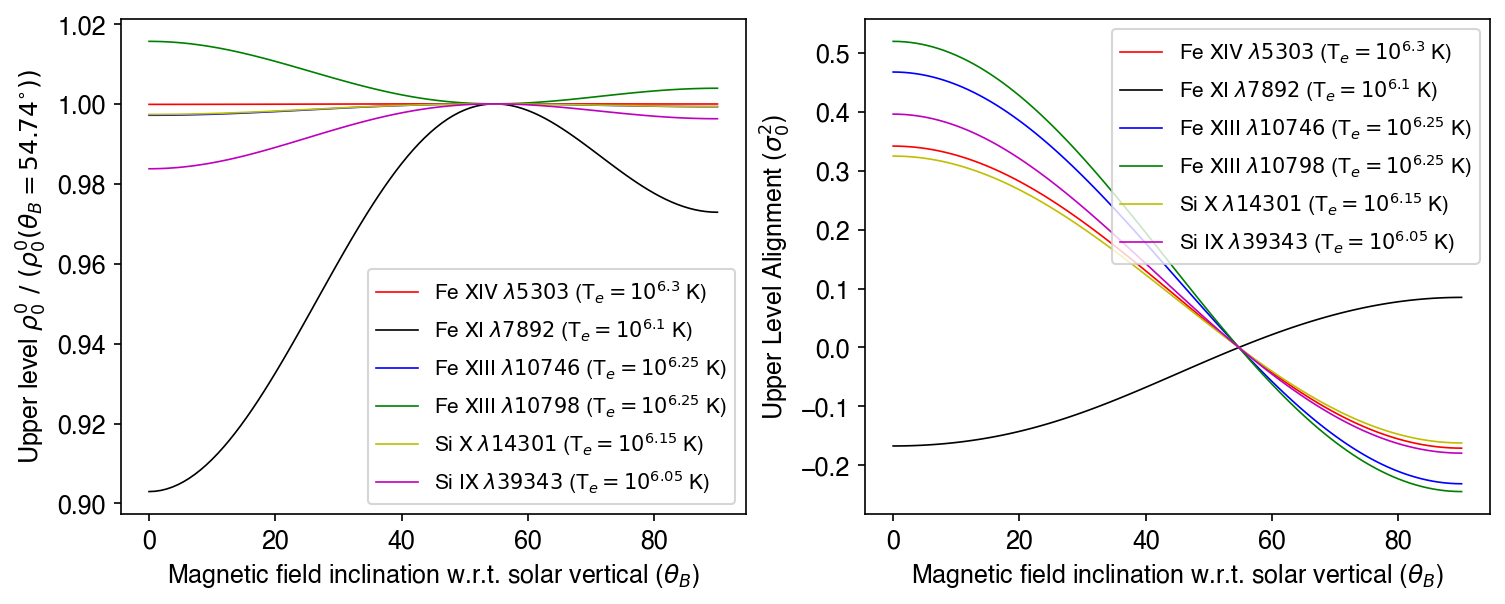

In [3]:
## PLOTTING 

mpl.rcParams.update({
    "font.size":12,        
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

titles = r'Fe XIV $\lambda5303$ (T$_{e} = 10^{6.3}$ K)', \
        r'Fe XI $\lambda7892$ (T$_{e} = 10^{6.1}$ K)', \
        r'Fe XIII $\lambda10746$ (T$_{e} = 10^{6.25}$ K)',\
        r'Fe XIII $\lambda10798$ (T$_{e} = 10^{6.25}$ K)',\
        r'Si X $\lambda14301$ (T$_{e} = 10^{6.15}$ K)',\
        r'Si IX $\lambda39343$ (T$_{e} = 10^{6.05}$ K)',

width, height = plt.figaspect(0.4)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(width,height), dpi=150)
ax = ax.flatten()

lw0 = 0.8
for n in range(6):
    ax[0].plot(thetabs,py_rho00[n,:]/py_rho00_ref[n],lw = lw0,linestyle = 'solid',label = titles[n])
    ax[1].plot(thetabs,py_align[n,:],lw = lw0,linestyle = 'solid',label = titles[n])
    

ax[0].set_xlabel(r'Magnetic field inclination w.r.t. solar vertical ($\theta_{B}$)')
ax[0].set_ylabel(r'Upper level $\rho^{0}_{0}{\ } /{\ } (\rho^{0}_{0} (\theta_{B} = 54.74^{\circ}))$')
ax[1].set_xlabel(r'Magnetic field inclination w.r.t. solar vertical ($\theta_{B}$)')
ax[1].set_ylabel(r'Upper Level Alignment ($\sigma^2_{0}$)')

ax[0].legend(fontsize = 10)
ax[1].legend(fontsize = 10)

fig.tight_layout(pad=0.5)